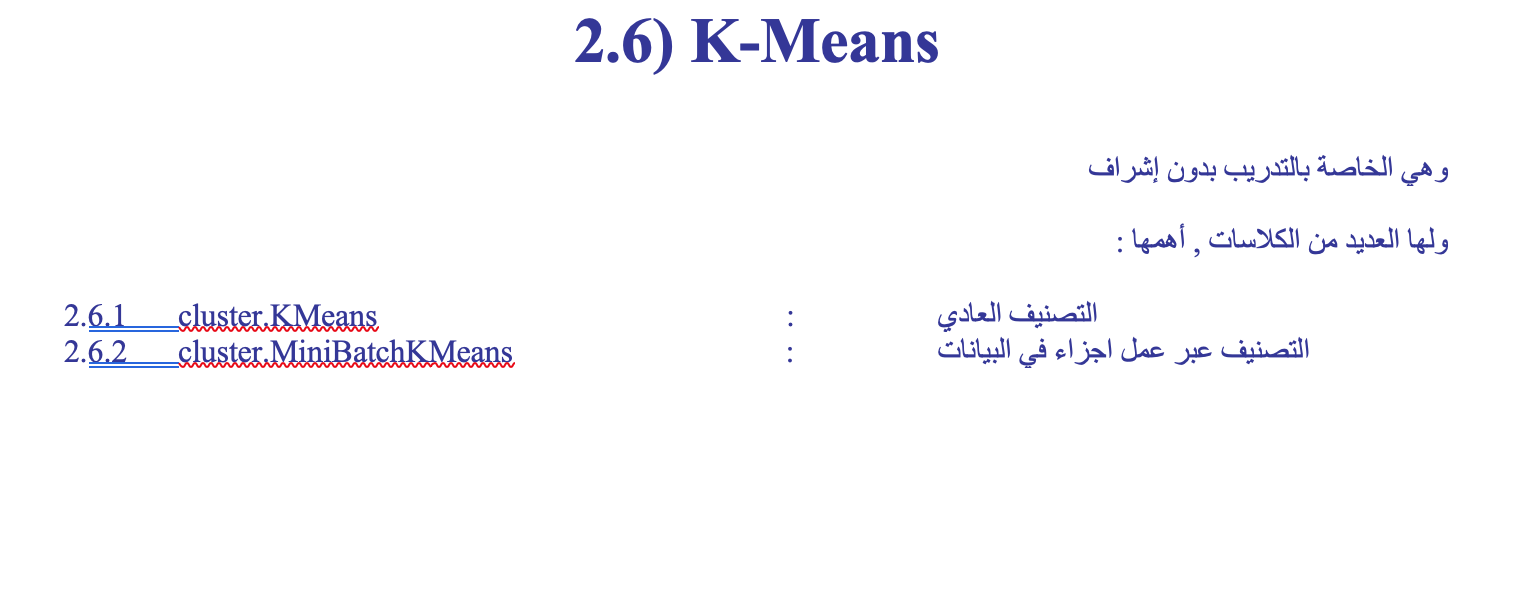

In [87]:
from IPython.display import Image
Image(filename='KM_1.png')

# K-Means

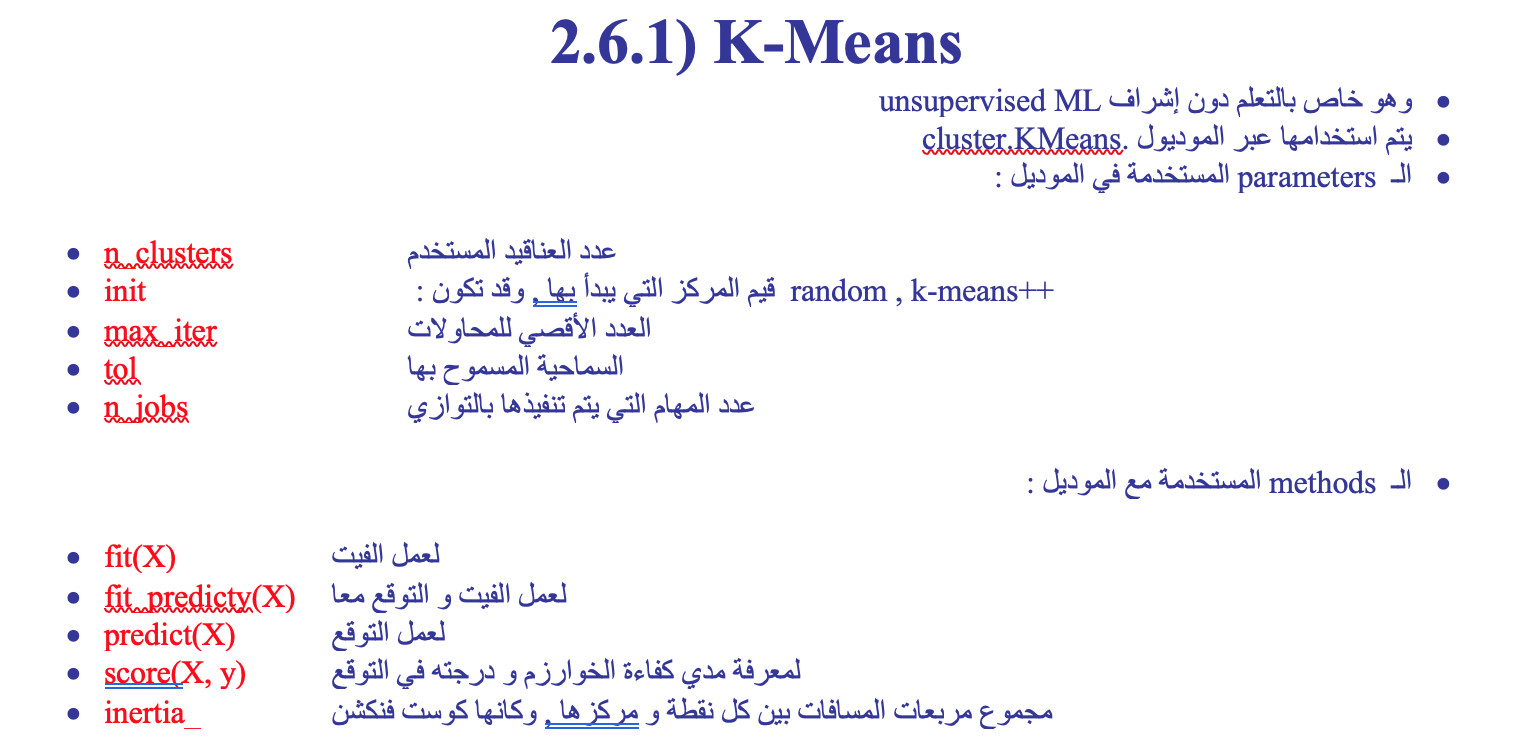

In [88]:
Image(filename='KM_2.png')

In [89]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris


In [90]:
'''
Defult parameters
sklearn.cluster.KMeans(n_clusters=8, init='k-means++’, n_init=10, max_iter=300,tol=0.0001,
                       precompute_distances='auto’, verbose=0, random_state=None, copy_x=True,
                       n_jobs=None, algorithm='auto’)
'''

"\nDefult parameters\nsklearn.cluster.KMeans(n_clusters=8, init='k-means++’, n_init=10, max_iter=300,tol=0.0001,\n                       precompute_distances='auto’, verbose=0, random_state=None, copy_x=True,\n                       n_jobs=None, algorithm='auto’)\n"

## Example 1 

In [91]:
# take data
data = pd.read_csv('data.csv')
X = data.iloc[:500,:].values
print(X.shape)

(500, 8)


In [121]:
# Applay K-Means
from sklearn.cluster import KMeans
inertia_list = []
number_of_clusters = 20
for i in range(1,number_of_clusters):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    inertia = k_means.inertia_
    inertia_list.append(inertia)
    print(i , '    '  , inertia)
    

1      1653.3886565541875
2      1027.8968940006607
3      654.1822053243856
4      413.30392046283873
5      349.83008983450395
6      295.5929246085563
7      250.60626864476538
8      211.16970816874186
9      183.64549836138744
10      168.70953934892646
11      154.50055233824992
12      141.9918180737342
13      130.42768898952036
14      119.64165296770736
15      110.86466452901682
16      103.53322258207689
17      98.2576538453632
18      93.2162939242152
19      87.57531657321235


Text(0, 0.5, 'inertias')

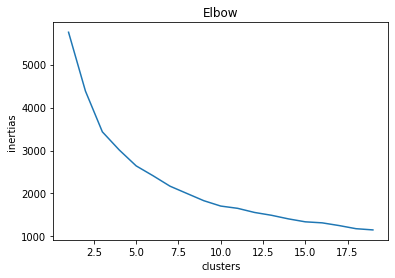

In [93]:
# plot the Elbow show
plt.plot(range(1,number_of_clusters), inertia_list)
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('inertias')


In [94]:
k_means = KMeans(n_clusters=5)
y_kmeans = k_means.fit_predict(X) # 0:4

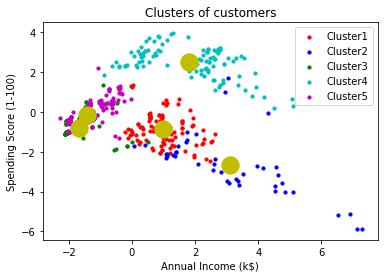

In [95]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'r', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'b', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'g', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'c', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'm', label = 'Cluster5')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 300, c = 'y')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


## Example 2

In [96]:
# data
iris = load_iris()
X = iris.data

In [97]:
# Applay K-Means
kmean = KMeans(n_clusters= 3 )
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [98]:
result = kmean.labels_
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [99]:
print(silhouette_score(X , result)) # for n_clusters= 3 [0,1,2]


0.5528190123564091


In [122]:
# perfect number of cluster
score = []
for i in range(2,11):
    kmean = KMeans(n_clusters= i )
    kmean.fit(X)
    result = kmean.labels_
    print(i , '    '  , silhouette_score(X , result))
    score.append(silhouette_score(X , result))


2      0.355761684940735
3      0.3776779914771941
4      0.40657459591368045
5      0.38919161809894787
6      0.3716613223431652
7      0.36844777565049597
8      0.3636502959902339
9      0.3652398027679175
10      0.35409880974075275


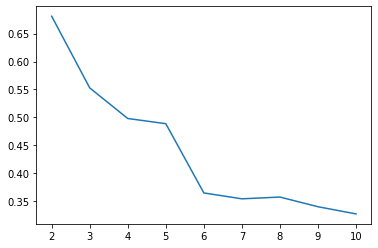

In [101]:
plt.plot(range(2,11) , score)
plt.show()

Text(0.5, 1.0, 'Clusters of customers')

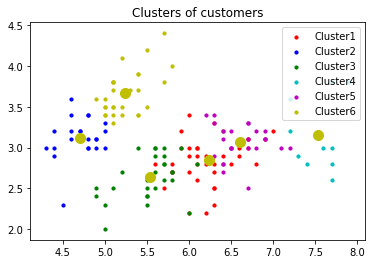

In [102]:
# Visualising the clusters
kmean = KMeans(n_clusters= 6 )
y_kmeans = kmean.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'r', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'b', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'g', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'c', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'm', label = 'Cluster5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 10, c = 'y', label = 'Cluster6')

plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s = 100, c = 'y')
plt.legend()
plt.title('Clusters of customers')


## 2- Mini Batch KMeans

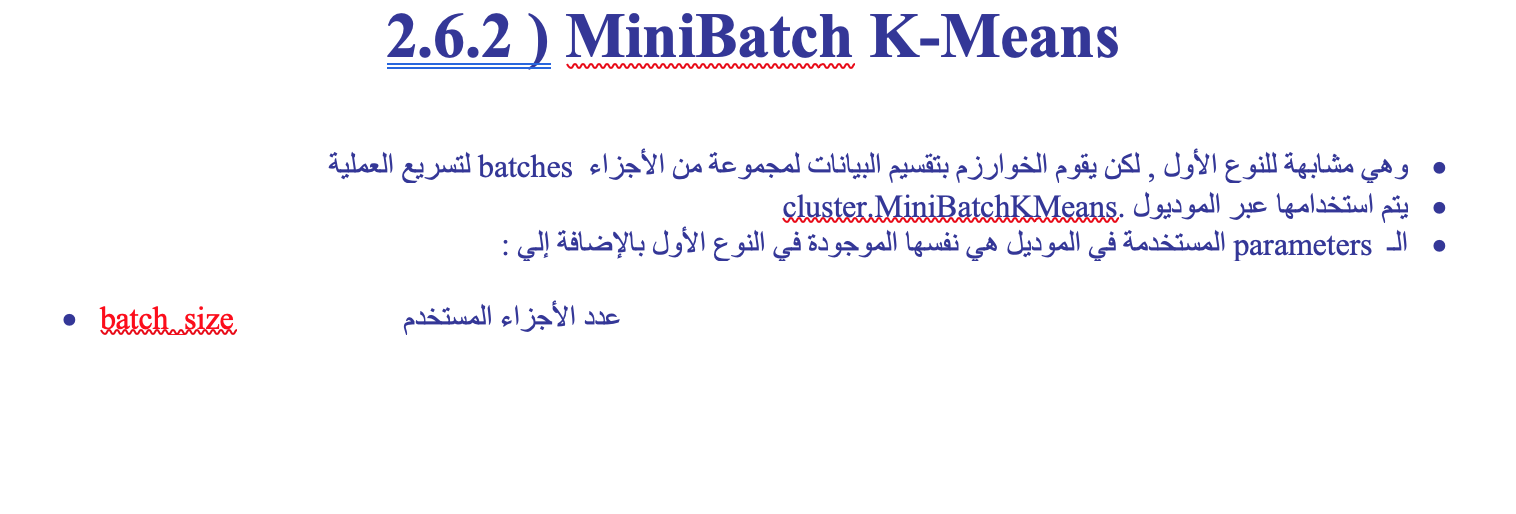

In [103]:
Image(filename='M_KM.png')

In [104]:
'''
#sklearn.cluster.MiniBatchKMeans(n_clusters=8, init='k-means++’, max_iter=100,batch_size=100, 
#                                verbose=0, compute_labels=True,random_state=None, tol=0.0,
#                                max_no_improvement=10,init_size=None, n_init=3, reassignment_ratio=0.01)
'''

"\n#sklearn.cluster.MiniBatchKMeans(n_clusters=8, init='k-means++’, max_iter=100,batch_size=100, \n#                                verbose=0, compute_labels=True,random_state=None, tol=0.0,\n#                                max_no_improvement=10,init_size=None, n_init=3, reassignment_ratio=0.01)\n"

In [105]:
#Import Libraries
from sklearn.cluster import MiniBatchKMeans
#----------------------------------------------------
# creating data
X = np.random.rand(10000,2)
y = np.random.rand(10000,0)
#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)

#----------------------------------------------------
#Applying MiniBatchKMeans Model 


MiniBatchKMeansModel = MiniBatchKMeans(n_clusters=5,batch_size=50,init='k-means++') #also can be random
MiniBatchKMeansModel.fit(X_train)

#Calculating Details
print('MiniBatchKMeansModel Train Score is : ' , MiniBatchKMeansModel.score(X_train))
print('MiniBatchKMeansModel Test Score is : ' , MiniBatchKMeansModel.score(X_test))
print('MiniBatchKMeansModel centers are : ' , MiniBatchKMeansModel.cluster_centers_)
print('MiniBatchKMeansModel labels are : ' , MiniBatchKMeansModel.labels_)
print('MiniBatchKMeansModel intertia is : ' , MiniBatchKMeansModel.inertia_)
print('MiniBatchKMeansModel No. of iteration is : ' , MiniBatchKMeansModel.n_iter_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = MiniBatchKMeansModel.predict(X_test)
print('Predicted Value for MiniBatchKMeansModel is : ' , y_pred[:10])

MiniBatchKMeansModel Train Score is :  -235.26920323676933
MiniBatchKMeansModel Test Score is :  -119.94983252047095
MiniBatchKMeansModel centers are :  [[0.39432761 0.54483714]
 [0.23461758 0.20051934]
 [0.77814515 0.23502761]
 [0.23405136 0.83570911]
 [0.77670323 0.75283743]]
MiniBatchKMeansModel labels are :  [1 3 1 ... 4 3 1]
MiniBatchKMeansModel intertia is :  235.26920323676933
MiniBatchKMeansModel No. of iteration is :  72
----------------------------------------------------
Predicted Value for MiniBatchKMeansModel is :  [1 2 4 4 4 2 0 1 2 3]
